# Imports

In [34]:
import numpy as np
import torch
from torch import nn
import pygad
import pygad.torchga as torchga
import gym

# Enviroment


In [35]:
env_si = gym.make("ALE/SpaceInvaders-v5")
env_si.reset()
print("Número de ações:")
print(env_si.action_space)
print("Significado das ações:")
print(env_si.get_action_meanings())

Número de ações:
Discrete(18)
Significado das ações:
['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE']


# Modelo Pytorch

In [40]:
conv1 = nn.Sequential(nn.Conv2d(3, 32, 7, padding=3),
                        nn.ReLU(True),
                        nn.MaxPool2d(4, 4))

conv2 = nn.Sequential(nn.Conv2d(32, 64, 5, padding=2),
                        nn.ReLU(True),
                        nn.MaxPool2d(4, 4))

conv3 = nn.Sequential(nn.Conv2d(64, 128, 3, padding=1),
                        nn.ReLU(True),
                        nn.MaxPool2d(4, 4))

flatten = nn.Flatten()

linear = nn.Sequential(nn.Linear(768, 18),
                        nn.Softmax())

model = nn.Sequential(conv1, conv2, conv3, flatten, linear)
print(model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Sequential(
    (0): Linear(in_features=768, out_features=18, bias=True)
    (1): Softmax(dim=None)
  )
)


# Função Fit

In [37]:
def fitness_func(solution, sol_idx):

    global env_si, model
    done = False
    state = env_si.render(mode="rgb_array").transpose(2,0,1) / 255
    total_reward = 0
    n_tries = 1

    for i in range(n_tries):

        env_si.reset()
        env_si.seed()
        n_steps = 1

        while not done:

            state = torch.tensor(state.astype(np.float32).reshape((1,3,210,160)))
            output = torchga.predict(model=model,
                                    solution=solution,
                                    data=state)
            action = torch.argmax(output)
            next_state, reward, done, _ = env_si.step(action)
            total_reward += reward
            state = next_state.transpose(2,0,1) / 255
            n_steps += 1
            if n_steps>=5000: 
                print("Limite de steps excedido!")
                break
    #print(f"Solução {sol_idx} da geração testada!")
    
    return total_reward / n_tries

# Algoritmo Evolutivo

/home/marvmelo/Code/env/lib/python3.9/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Generation = 1
Fitness    = 285.0
Generation = 2
Fitness    = 285.0
Generation = 3
Fitness    = 285.0
Generation = 4
Fitness    = 285.0
Generation = 5
Fitness    = 370.0
Generation = 6
Fitness    = 505.0
Generation = 7
Fitness    = 505.0
Generation = 8
Fitness    = 780.0
Generation = 9
Fitness    = 505.0
Generation = 10
Fitness    = 505.0
Generation = 11
Fitness    = 575.0
Generation = 12
Fitness    = 575.0
Generation = 13
Fitness    = 575.0
Generation = 14
Fitness    = 575.0
Generation = 15
Fitness    = 575.0
Generation = 16
Fitness    = 575.0
Generation = 17
Fitness    = 605.0
Generation = 18
Fitness    = 605.0
Generation = 19
Fitness    = 605.0
Generation = 20
Fitness    = 605.0
Generation = 21
Fitness    = 605.0
Generation = 22
Fitness    = 605.0
Generation = 23
Fitness    = 605.0
Generation = 24
Fitness    = 635.0
Generation = 25
Fitness    = 605.0
Generation = 26
Fitness    = 605.0
Generation = 27
Fitness    = 645.0
Generation = 28
Fitness    = 605.0
Generation = 29
Fitness    = 

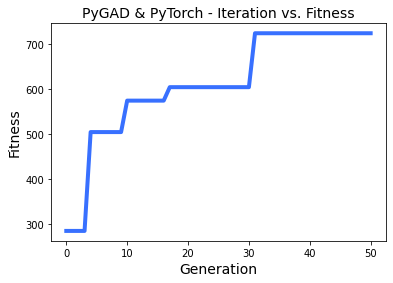

Fitness value of the best solution = 725.0
Index of the best solution : 0


In [38]:
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

torch_ga = torchga.TorchGA(model=model,
                           num_solutions=25)

num_generations = 50 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation,
                       mutation_probability=0.9,
                       random_mutation_max_val=0.1,
                       random_mutation_min_val=-0.1)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))


In [39]:
solution_dict = torchga.model_weights_as_dict(model, solution)
torch.save(solution_dict, "evonet_complex")

In [ ]:

import cv2
import numpy as np

frameSize = (160, 210)
env_si.reset()
env_si.seed()
model.load_state_dict(solution_dict)
out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, frameSize)
img = env_si.render(mode="rgb_array")
done = False
total_reward = 0

while not done:

    out.write(img)
    img = torch.tensor(img.transpose((2,0,1)).reshape((1,3,210,160)).astype(np.float32)/255)
    action = torch.argmax(model(img))
    img, reward, done, _ = env_si.step(action)
    total_reward += reward
print(total_reward)

out.release()

715.0


# Modelo com autoencoder

In [24]:
model = nn.Sequential(nn.Linear(50, 20),
                    nn.ReLU(True),
                    nn.Linear(20, 18),
                    nn.Softmax(dim=0))

print(model)

Sequential(
  (0): Linear(in_features=50, out_features=20, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=20, out_features=18, bias=True)
  (3): Softmax(dim=0)
)


# Autoencoder

In [25]:
class AutoEncoder(nn.Module):

    def __init__(self) -> None:
        super(AutoEncoder, self).__init__()

        self.conv_encoder = nn.Sequential(nn.Conv2d(3, 32, 7, padding=3),
                        nn.ReLU(True),
                        nn.MaxPool2d(4, 4),
                        nn.Conv2d(32, 64, 5, padding=2),
                        nn.ReLU(True),
                        nn.MaxPool2d(4, 4))

        self.linear_encoder = nn.Sequential(nn.Flatten(),
                        nn.Linear(8320, 50),
                        nn.ReLU(True))

        self.linear_decoder = nn.Sequential(nn.Linear(50, 8320),
                        nn.ReLU(True),
                        nn.Unflatten(1, (64,13,10)))

        self.conv_decoder = nn.Sequential(nn.ConvTranspose2d(64, 32, 4, stride=4),
                        nn.ReLU(True),
                        nn.ConvTranspose2d(32, 3, 4, stride=4, output_padding=(2,0)),
                        nn.Sigmoid())

    def forward(self, x, mode=0):

        y = self.conv_encoder(x)
        y = self.linear_encoder(y)
        if mode==1: 
          return y
        y = self.linear_decoder(y)
        y = self.conv_decoder(y)
        return y

conv_ae = AutoEncoder()
conv_ae.load_state_dict(torch.load("conv_ae"))

<All keys matched successfully>

# Função de fitness

In [26]:
def fitness_func(solution, sol_idx):

    global env_si, model
    done = False
    state = env_si.render(mode="rgb_array").transpose(2,0,1) / 255
    total_reward = 0
    n_tries = 1

    for i in range(n_tries):

        env_si.reset()
        env_si.seed()
        n_steps = 1

        while not done:

            state = torch.tensor(state.astype(np.float32).reshape((1,3,210,160)))
            data = conv_ae.forward(state, mode=1)
            output = torchga.predict(model=model,
                                    solution=solution,
                                    data=data[0])
            action = torch.argmax(output)
            next_state, reward, done, _ = env_si.step(action)
            total_reward += reward
            state = next_state.transpose(2,0,1) / 255
            n_steps += 1
            if n_steps>=5000: 
                print("Limite de steps excedido!")
                break
    #print(f"Solução {sol_idx} da geração testada!")
    
    return total_reward / n_tries

# Algoritmo Evolutivo

Generation = 1
Fitness    = 520.0
Generation = 2
Fitness    = 285.0
Generation = 3
Fitness    = 520.0
Generation = 4
Fitness    = 520.0
Generation = 5
Fitness    = 565.0
Generation = 6
Fitness    = 565.0
Generation = 7
Fitness    = 565.0
Generation = 8
Fitness    = 565.0
Generation = 9
Fitness    = 565.0
Generation = 10
Fitness    = 635.0
Generation = 11
Fitness    = 865.0
Generation = 12
Fitness    = 635.0
Generation = 13
Fitness    = 635.0
Generation = 14
Fitness    = 635.0
Generation = 15
Fitness    = 635.0
Generation = 16
Fitness    = 635.0
Generation = 17
Fitness    = 635.0
Generation = 18
Fitness    = 635.0
Generation = 19
Fitness    = 635.0
Generation = 20
Fitness    = 955.0
Generation = 21
Fitness    = 955.0
Generation = 22
Fitness    = 955.0
Generation = 23
Fitness    = 955.0
Generation = 24
Fitness    = 955.0
Generation = 25
Fitness    = 955.0
Generation = 26
Fitness    = 955.0
Generation = 27
Fitness    = 955.0
Generation = 28
Fitness    = 955.0
Generation = 29
Fitness    = 

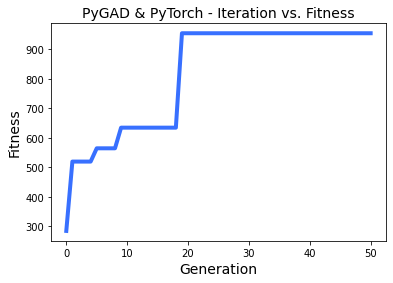

Fitness value of the best solution = 955.0
Index of the best solution : 0


In [27]:
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

torch_ga = torchga.TorchGA(model=model,
                           num_solutions=25)

num_generations = 50 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation,
                       mutation_probability=0.9,
                       random_mutation_max_val=0.1,
                       random_mutation_min_val=-0.1)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))


In [28]:
solution_dict = torchga.model_weights_as_dict(model, solution)
torch.save(solution_dict, "evonet_complex")

In [33]:
import cv2
import numpy as np

frameSize = (160, 210)
env_si.reset()
env_si.seed()
model.load_state_dict(solution_dict)
out = cv2.VideoWriter('output_video1.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, frameSize)
img = env_si.render(mode="rgb_array")
done = False
total_reward = 0

while not done:

    out.write(img)
    img = torch.tensor(img.transpose((2,0,1)).reshape((1,3,210,160)).astype(np.float32)/255)
    embed_img = conv_ae.forward(img, mode=1)[0]
    action = torch.argmax(model(embed_img))
    img, reward, done, _ = env_si.step(action)
    total_reward += reward
print(total_reward)

out.release()

955.0
